In [2]:
%reset
from sympy import init_printing
from tqdm.auto import tqdm
import sympy as sp
import pandas as pd
import random
import string
import traceback
from func_timeout import func_set_timeout
init_printing()

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


**Vocabulary**

In [3]:
symbol = lambda x: sp.Symbol(x, commutative = True)

In [4]:
identifiers = [i for i in list(string.ascii_lowercase + string.ascii_uppercase) if i not in ['i','e','d','O']]

In [5]:
symbols = [symbol(i) for i in identifiers]

**Rules**

In [6]:
def add(x, y):
    
    if type(x) == sp.Equality:
        return sp.Eq(x.args[0] + y, x.args[1] + y)
    
    else:
        return x + y

In [7]:
add(symbols[0], symbols[1])

In [8]:
def minus(x, y):
    
    if type(x) == sp.Equality:
        return sp.Eq(x.args[0] - y, x.args[1] - y)
    
    else:
        return x - y

In [9]:
def times(x, y):
    
    if type(x) == sp.Equality:
        return sp.Eq(x.args[0]*y, x.args[1]*y)
    
    else:
        return x*y

In [10]:
def power(x, y):
    
    if type(x) == sp.Equality:
        return sp.Eq(x.args[0]**y, x.args[1]**y)
    
    else:
        return x**y

In [11]:
def divide(x, y):
    
    if type(x) == sp.Equality:
        return sp.Eq(x.args[0]/y, x.args[1]/y)
    
    else:
        return x/y

In [12]:
def differentiate(x, y):
    
    if type(x) == sp.Equality:
        return sp.Eq(sp.diff(x.args[0], y, evaluate=False), sp.diff(x.args[1], y, evaluate=False))
    
    else:
        y = random.choice(list(x.free_symbols))
        return sp.diff(x, y, evaluate = False)

In [13]:
def integrate(x, y):
    
    if type(x) == sp.Equality:
        return sp.Eq(sp.Integral(x.args[0], y), sp.Integral(x.args[1], y))
    
    else:
        y = random.choice(list(x.free_symbols))
        return sp.Integral(x, y)

In [14]:
def evaluate_integrals(x):
    # assumes derivation D is a global list of equations
    # D_local is a local copy of D which is edited within this function
    # assumes a list of symbols
    # does not integrate terms containing DOUBLE INTEGRALS or higher
    
    if not contains_double_integral(x):
    
        D_local = [i[0] for i in D.copy()]

        used_symbols = []
        for eq in D_local:
            used_symbols.extend(list(eq.free_symbols))

        integral_constants = [i for i in symbols if i not in used_symbols]

        if type(x) == sp.Integral:
            return x.doit() + random.choice(integral_constants)

        elif type(x) == sp.Equality:
            elems = get_equation_elements(x)

            integrals = [i for i in elems if type(i) == sp.Integral]

            subs = [(i, i.doit() + random.choice(integral_constants)) if str(sp.simplify(i)) != str(sp.simplify(i.doit())) else (i, i) for i in integrals]

            for i in subs:
                x = x.subs(i[0], i[1])

            return x

        else:
            return x
        
    else:
        
        return x
    
    # delete elses

In [15]:
def evaluate_derivatives(x):
    
    if type(x) == sp.Derivative:
        return x.doit()
    
    elif type(x) == sp.Equality:
        elems = get_equation_elements(x)
        
        derivatives = [i for i in elems if (type(i) == sp.Derivative) and ('\int' not in sp.latex(i))]
        
        subs = [(i, i.doit()) for i in derivatives]
        
        for i in subs:
            x = x.subs(i[0], i[1])
            
        return x
    
    else:
        return x

In [16]:
def cos(x):
    
    if type(x) == sp.Equality:
        return sp.Eq(sp.cos(x.args[0]), sp.cos(x.args[1]))
    
    else:
        return sp.cos(x)

In [17]:
def sin(x):
    
    if type(x) == sp.Equality:
        return sp.Eq(sp.sin(x.args[0]), sp.sin(x.args[1]))
    
    else:
        return sp.sin(x)

In [18]:
def exp(x):
    
    if type(x) == sp.Equality:
        return sp.Eq(sp.exp(x.args[0]), sp.exp(x.args[1]))
    
    else:
        return sp.exp(x)

In [19]:
def log(x):
    
    if type(x) == sp.Equality:
        return sp.Eq(sp.log(x.args[0]), sp.log(x.args[1]))
    
    else:
        return sp.log(x)

In [20]:
def expand(x):
    return sp.expand(x)

In [21]:
def substitute_LHS_for_RHS(eq_1, eq_2):
    return eq_1.subs(eq_2.args[0], eq_2.args[1])

In [22]:
def substitute_RHS_for_LHS(eq_1, eq_2):
    return eq_1.subs(eq_2.args[1], eq_2.args[0])

In [23]:
def get_premise(symbols):
    
    rules_1 = [cos, sin, exp, log]
    rules_2 = [add, minus, times, power, divide, differentiate, integrate]
    
    arity = random.choice([1,2])

    if arity == 1:
        rule = random.choice(rules_1)
        sym = random.choice(symbols)
        RHS = rule(sym)
        LHS = random.choice([i for i in symbols if i != sym])

    elif arity == 2:
        rule = random.choice([i for i in rules_2 if i not in [differentiate, integrate]])
        sym_1 = random.choice(symbols)
        sym_2 = random.choice([i for i in symbols if i != sym_1])
        RHS = rule(sym_1, sym_2)
        LHS = random.choice([i for i in symbols if i not in [sym_1, sym_2]])
        

    # make RHS more complex
    complexity = random.choice(range(2))

    for i in range(complexity):
        
        arity = random.choice([1,2])
        
        if arity == 1:
            rule = random.choice(rules_1)
            RHS = rule(RHS)
            
        elif arity == 2:
            rule = random.choice(rules_2)
            sym = random.choice(symbols)
            
            RHS = rule(RHS, sym)
            
    LHS = sp.Function(LHS)(*tuple(RHS.free_symbols))

    eq = sp.Eq(LHS, RHS)
    
    return eq

In [24]:
def renaming_premise(symbols):
    
    while True:
        elems = []
        for eq, _ in D:
            elems.extend(get_equation_elements(eq))

        elems = list(dict.fromkeys(elems))

        # more than one free symbol in RHS
        elems = [i for i in elems if len(list(i.free_symbols)) > 0 and len(str(i)) > 1]

        RHS = random.choice(elems)

        LHS = sp.Function(random.choice([i for i in symbols if i not in RHS.free_symbols]))(*tuple(RHS.free_symbols))
        
        if len(str(type(RHS))) > 1 and str(LHS) not in str(D):
            break

    return sp.Eq(LHS, RHS)

In [25]:
def get_equation_elements(eq):

    args = list(eq.args)

    while True:

        old_length = len(args)

        for i in args:
            args.extend(i.args)

        args = list(dict.fromkeys(args))

        new_length = len(args)

        if new_length == old_length:
            break
            
    return [i for i in args if type(i) != sp.Tuple]

In [124]:
contains_double_integral = lambda eq: True if True in ['iint' in sp.latex(i) for i in get_equation_elements(eq)] else False

In [27]:
def pref_eqs(D, p):
    # makes the last equation p times more likely
    # equation n-i is p-i times more likely

    out = []

    new_D = D.copy()[-p:]
    new_D.reverse()
    for i in range(len(new_D)):
        if p-1 > i:
            out.extend([new_D[i]]*(p-i-1)**3)
        
    out.reverse()
    return D + out

In [28]:
def valid_substitutions(rule_name, D):

    sub_options = []
    
    for i in D:
        for j in D:
            if str(i) != str(j):
                LHS, RHS = j.args
                
                if (type(LHS) is not sp.numbers.One) and (type(LHS) is not sp.numbers.Zero) and (type(RHS) is not sp.numbers.Zero) and (type(RHS) is not sp.numbers.One):
                
                    if rule_name == "substitute_LHS_for_RHS":

                        if (str(LHS) in str(i)) and (type(i.subs(LHS, RHS)) is sp.Equality) and (i.subs(LHS, RHS) != i):

                            pair = [D.index(i), D.index(j)]
                            sub_options.append(pair) if pair not in sub_options else 0

                    elif rule_name == "substitute_RHS_for_LHS":

                        if (str(RHS) in str(i)) and (type(i.subs(RHS, LHS)) is sp.Equality) and (i.subs(RHS, LHS) != i):

                            pair = [D.index(i), D.index(j)]
                            sub_options.append(pair) if (pair not in sub_options) and (pair[0] != pair[1]) else 0
                    
    return sub_options

In [206]:
@func_set_timeout(5)
def step(D, p_history=10, p_arity_0=5, p_renaming=100, p_arity_1=50, p_evaluate=50, p_arity_2=100, p_int_or_diff=2, p_subs=30):
    
    
    # p_history: equation n-i is p-i times more likely (prioritises more recent equations like memory)
    # p_arity_0: overall probability multiplier for arity 0 functions
    # p_renaming: relevant prob multiplier for renaming premises
    # p_arity_1: overall probability multiplier for arity 1 functions
    # p_evaluate: relative probabilty of int or diff evaluations is multiplied by p_evaluate for arity 1 functions
    # p_arity_2: overall probability multiplier for arity 2 functions
    # p_int_or_diff: relative probability multiplier for int or diff compared to other arity 2 functions without multipliers
    # p_subs: same as p_int_or_diff but for substitution functions
    
    A = [i[1] for i in D] # only annotations
    D = [i[0] for i in D] # only equations
    
    rules_0 = [
        
        get_premise


    ] + [renaming_premise]*p_renaming
    

    rules_1 = [
        
        cos,
        sin,
        exp,
        log,
        expand
        
    ] + [evaluate_derivatives, evaluate_integrals]*p_evaluate
    
    
    rules_2 = [
        
        add,
        minus,
        times,
        divide,
        power
    
    ] + [differentiate, integrate]*p_int_or_diff + [substitute_LHS_for_RHS, substitute_RHS_for_LHS]*p_subs


    # assumes D has at least one equation so far
    relevant_equation_elements = []

    for eq in D:
        relevant_equation_elements.extend(get_equation_elements(eq))
    relevant_equation_elements = list(dict.fromkeys(relevant_equation_elements))

    arity = random.choice([0]*p_arity_0 + [1]*p_arity_1 +[2]*p_arity_2)
    
    elem_1 = 0
    
    if arity == 0:
        rule = random.choice(rules_0)
        eq = rule(symbols)
        annotation = rule.__name__

    if arity == 1:
        rule = random.choice(rules_1)

        # elem_1 can be equation
        elem_1 = random.choice(pref_eqs(D, p_history))
        eq = rule(elem_1)
                
        n = D.index(elem_1)
                
        annotation = [rule.__name__, n+1]
                

    if arity == 2:
        
        # no substitution rules if only 1 equation in D
        if len(D) == 1:
            
            rule = random.choice([i for i in rules_2 if 'subs' not in str(i.__name__)])
        else:
            
            rule = random.choice(rules_2)
        
        # substitution
        if ("subs" in rule.__name__):
            
            # alex says empty lists are falsey, a list with anything in is truthy,
            # so we only need `if valid_substitutions(rule.__name__, D)@`
            if valid_substitutions(rule.__name__, D) != []:
                

                n_1, n_2 = random.choice(valid_substitutions(rule.__name__, D))

                elem_1, elem_2 = D[n_1], D[n_2]
                
                annotation = [rule.__name__, n_1+1, n_2+1]
            
        
        # integration or differentiation
        elif rule.__name__ in ['integrate', 'differentiate']:
            
            # elem_1 can be an equation
            elem_1 = random.choice(pref_eqs(D, p_history))

            # elem_2 can be an equation with components in elem_1
            elem_2 = random.choice([i for i in get_equation_elements(elem_1) if len(str(i)) == 1 and str(i) not in string.digits])
            
            n = D.index(elem_1)
                    
            annotation = [rule.__name__, n+1, elem_2]
            
        
        # integration or differentiation
        elif rule.__name__ in ['power']:
            
            # elem_1 can be an equation
            elem_1 = random.choice(pref_eqs(D, p_history))

            # elem_2 can be an equation with components in elem_1
            elem_2 = random.choice([i for i in get_equation_elements(elem_1) if len(str(i)) < 3])
            
            n = D.index(elem_1)
                    
            annotation = [rule.__name__, n+1, elem_2]
            

        else:

            # elem_1 can be an equation
            elem_1 = random.choice(pref_eqs(D, p_history))

            # elem_2 can be an equation element
            elem_2 = random.choice([i for i in relevant_equation_elements if str(i) not in string.digits])
            
            n = D.index(elem_1)
                    
            annotation = [rule.__name__, n+1, elem_2]

        eq = rule(elem_1, elem_2)
        

    if type(eq) == sp.Equality:
            
        swapped_eq = sp.Eq(eq.args[1], eq.args[0])

        if (eq in D) or ('Subs' in str(eq)) or ('Piecewise' in str(eq)) or (swapped_eq in D) or len(sp.latex(eq)) >= 350:
            return False

        # success
        else:
            return (eq, annotation)

    else:
        return False

In [ ]:
# # def foo(predicate):
# #     # elem_1 can be an equation
# #     elem_1 = random.choice(pref_eqs(D, p_history))

# #     # elem_2 can be an equation with components in elem_1
# #     elem_2 = random.choice([i for i in get_equation_elements(elem_1) if predicate(i)])

# #     n = D.index(elem_1)

# #     annotation = [rule.__name__, n+1, elem_2]

# #     eq = rule(elem_1, elem_2)

# #     return eq, annotation

# # integration or differentiation


# elif rule.__name__ in ['integrate', 'differentiate']:

#     eq, annotation = foo(lambda i: len(str(i)) == 1 and str(i) not in string.digits)


# # integration or differentiation
# elif rule.__name__ in ['power']:

#     eq, annotation = foo(lambda i: len(str(i)) < 3)

# else:

#     eq, annotation = foo(lambda i: str(i) not in string.digits)

In [30]:
# for j in range(len(D)):
#     print(j+1)
#     eq, annotation = D[j]
    
#     if type(annotation) == tuple:
#         for i in annotation:
#             display(i)
#     else:
#         print(annotation)
    
#     print('\n')
#     display(eq)
    
#     print('--------------------------------------------------------------------------------------------')

**Use annotations to only include relevant steps in a derivation**

In [31]:
def extract_chain_starting_from_i(i, eq_pairs):
    # eq_pairs is a reverse chronological list of current equation numbers,
    # and the past equation numbers used to make them 
    # e.g., [30, 28], [29, 14], [28, 23, 2]
    
    chain = [eq_pairs[i]]


    while True:

        current_eq = chain[-1][0]
        used_eq = chain[-1][1]

        for pair in eq_pairs:

            last_eq = pair[0]
            if last_eq == used_eq:
                chain.append(pair)

        if (len(chain[-1]) == 1):
            #if pair not in chain: chain.append(pair)
            chain.append(pair) if pair not in chain else 0
            break

    chain_nums = []
    for i in chain:
        chain_nums.extend(i)

    valid_chain = [i for i in chain if len(i) == 1 and i[0] in chain_nums] + chain

    chain = [i for i in chain if i in valid_chain]

    return chain

In [32]:
def merge_chains(chain, eq_pairs):
    
    # finds all chains which come from separate derivations that are substituted in
    # merges any new equations reverse chronologically
    
#     old_chain = None
#     while old_chain != chain:

    while True:
    
        old_chain = chain.copy()

        first_numbers = [i[0] for i in chain]

        # unaccounted for eqs
        missing_eqs = [i[2] for i in chain if len(i) > 2] + [i[1] for i in chain if len(i) > 1 and i[1] not in first_numbers]

        for i in eq_pairs:
            chain.append(i) if (i[0] in missing_eqs) and i not in chain else 0

        if old_chain == chain:
            break

    chain_dict = {i[0]:i for i in chain}

    return sorted(chain)

In [33]:
is_subset = lambda chain_1, chain_2: [i for i in chain_1 if i not in chain_2] == [] if chain_1 != chain_2 else False

In [ ]:
def extract_derivations(D):
    
    A = [[i+1] + list(D[i][1]) if type(D[i][1]) is list else [i+1, D[i][1]] for i in range(len(D))]

    A.reverse()

    eq_pairs = []

    for row in A:
        if 'subs' in str(row):
            eq_pairs.append([row[0], row[2], row[3]])
        elif 'premise' in str(row):
            eq_pairs.append([row[0]])
        else:
            eq_pairs.append([row[0], row[2]])

    chains = []
    for i in range(len(eq_pairs)-1):
        if len(eq_pairs[i]) > 1:
            chains.append(extract_chain_starting_from_i(i, eq_pairs))

    chains = [merge_chains(i, eq_pairs) for i in chains]

    final_chains = [i for i in chains.copy() if len(i) >= 3]
    for i in chains:
        for j in chains:
            if is_subset(i,j):
                try:
                    final_chains.remove(i)
                except:
                    pass

    derivations = []

    for n in range(len(final_chains)):
        D_idxs = [i[0]-1 for i in final_chains[n]]

        derivation = [D[n] for n in D_idxs]

        derivations.append(derivation)

    return derivations

In [ ]:
# final_chains = [chain for chain in chains.copy() if len(chain) >= 3]
# for i in chains:
#     for j in chains:
#         if is_subset(i,j) and i in final_chains:
#             final_chains.remove(i)

In [35]:
def fix_equation_indexes(derivation, D):

    good_bad_idxs = [[i+1,D.index(derivation[i])+1] for i in range(len(derivation))]

    for i in range(len(derivation)):
        for j in range(len(derivation[i][1])):
            for idx in good_bad_idxs:
                if derivation[i][1][j] == idx[1]:
                    derivation[i][1][j] = idx[0]
                    
    return derivation

In [36]:
def create_df_row(derivation):

    data = []
    for i in range(len(derivation[:6])):
        row = []

        eq, annotation = derivation[i]

        row.append(i+1)

        if type(annotation) is str:
            row.append(annotation)
            row.extend(['','',''])

        else:
            if len(annotation) == 2:
                row.extend(annotation)
                row.append('')
                row.append('')

            else:
                row.extend(annotation[:2])

                sec_arg = annotation[-1]

                if type(sec_arg) is int:
                    row.append(sec_arg)
                    row.append('')

                else:
                    row.append(sp.latex(sec_arg))
                    row.append(sp.srepr(sec_arg))


        row.extend([sp.srepr(eq), sp.latex(eq)])  

        data.extend(row)
        
    cols = ['eq_idx_1', 'rule_1', 'arg_11', 'arg_12', 'arg_12_srepr', 'eq_1_srepr', 'eq_1',
        'eq_idx_2', 'rule_2', 'arg_21', 'arg_22', 'arg_22_srepr', 'eq_2_srepr', 'eq_2',
        'eq_idx_3', 'rule_3', 'arg_31', 'arg_32', 'arg_32_srepr', 'eq_3_srepr', 'eq_3',
        'eq_idx_4', 'rule_4', 'arg_41', 'arg_42', 'arg_42_srepr', 'eq_4_srepr', 'eq_4',
        'eq_idx_5', 'rule_5', 'arg_51', 'arg_52', 'arg_52_srepr', 'eq_5_srepr', 'eq_5',
        'eq_idx_6', 'rule_6', 'arg_61', 'arg_62', 'arg_62_srepr', 'eq_6_srepr', 'eq_6']

    df = pd.DataFrame(data).transpose()
    df.columns = cols
    
    return df

In [83]:
def reconstruct_derivation(df, i, printing=False):

    row = list(df.iloc[i])
    d = []
    for i in range(7):
        j = 7*i
        d.append(row[j:j+7]) if row[j:j+7] != [] else 0

        
# This is practical
#     d = []
#     for i in range(7):
#         entry := row[7*i:7*(i+1)]
#         if row:
#             d.append(entry)

# This is code golf
#     d = [entry for i in range(7) if (entry := row[7*i:7*(i+1)])]

        
    d = [[sp.sympify(i[-2]),[i[1],i[2],i[3]]] if str(i[3]) in string.digits else [sp.sympify(i[-2]),[i[1],i[2],i[4]]] for i in d]

    new_d = []
    for i in d:
        eq, annotation = i

        annotation = [i for i in annotation if (str(i) != '') and (str(i) != 'nan')]

        if (len(annotation) > 1) and (str(annotation[-1]) not in string.digits):
            annotation[-1] = sp.sympify(annotation[-1])

        new_d.append((eq, annotation)) if len(annotation) > 1 else new_d.append((eq, annotation[0]))


    d = new_d
    
    if printing is True:
        
        j = 1
        for i in d:
            print(j)
            j += 1
            print(i[1])
            display(i[0])
            print('\n')
            
    else:
        
        return d

In [38]:
def create_alternative_final_equations(df, i, error_log = False):

    D = reconstruct_derivation(df, i)

    correct_eq = D[-1][0]

    alternative_equations = []

    D = D[:5]
    
    error_log = []

    while True:
        try:
            next_step = step(D)

        except Exception:
            next_step = False
            error = traceback.format_exc()
            error_log.append(error) if error not in error_log else 0

        eval_ints = [i[1] for i in D if 'evaluate_integrals' in str(i[1])]

        alternative_equations.append(next_step) if (next_step != False) and (str(next_step[0]) != str(correct_eq))\
        and (next_step[1] not in eval_ints) and (str(next_step[0]) not in str(alternative_equations))\
        and ('premise' not in str(next_step)) else 0
    
        if len(alternative_equations) >= 4:
            break
    
    if error_log == True:
        return alternative_equations, error_log
    
    else:
        return [sp.srepr(i[0]) for i in alternative_equations] + [sp.latex(i[0]) for i in alternative_equations], [i[1] for i in alternative_equations]

**Main generation loop**

In [40]:
# df = pd.DataFrame(columns = ['eq_idx_1', 'rule_1', 'arg_11', 'arg_12', 'arg_12_srepr', 'eq_1_srepr', 'eq_1',
#         'eq_idx_2', 'rule_2', 'arg_21', 'arg_22', 'arg_22_srepr', 'eq_2_srepr', 'eq_2',
#         'eq_idx_3', 'rule_3', 'arg_31', 'arg_32', 'arg_32_srepr', 'eq_3_srepr', 'eq_3',
#         'eq_idx_4', 'rule_4', 'arg_41', 'arg_42', 'arg_42_srepr', 'eq_4_srepr', 'eq_4',
#         'eq_idx_5', 'rule_5', 'arg_51', 'arg_52', 'arg_52_srepr', 'eq_5_srepr', 'eq_5',
#         'eq_idx_6', 'rule_6', 'arg_61', 'arg_62', 'arg_62_srepr', 'eq_6_srepr', 'eq_6'])

df = pd.read_pickle('derivations_2.pkl')

#derivations = [reconstruct_derivation(df, i) for i in range(len(df))]

derivations = []

T = 12000 - len(df)

with tqdm(total=T) as pbar:

    while True:
        eq = get_premise(symbols)

        D = [(eq, "premise")]
        error_log = []

        while True:
            
            try:
                next_step = step(D)

            except Exception:
                error = traceback.format_exc()
                error_log.append(error) if error not in error_log else 0
                
            except:
                print('timeout')

            eval_ints = [i[1] for i in D if 'evaluate_integrals' in str(i[1])]

            D.append(next_step) if (next_step != False) and (next_step not in D) and (next_step[1] not in eval_ints) else 0
            
            if len(D) >= 6 and ('premise' not in str(D[-1])):
                break
        
        try:
            derivation = fix_equation_indexes(extract_derivations(D)[0], D)
        except:
            derivation = []


        if len(derivation) == 6:
            derivations.append(derivation)
            print(len(df)) if len(df) %10 == 0 else 0
            
            df = pd.concat([df, create_df_row(derivation)])
            df.to_pickle('derivations_2.pkl') if len(derivations) %10 == 0 else 0
            
            pbar.update(1)

        if len(df) >= T:
            break

  0%|          | 0/5717 [00:00<?, ?it/s]

In [56]:
next_equation_data = []
loop = tqdm(range(len(df)))
for i in loop:
    try:
        print((i, 'ok'))
        next_equation_data.append(create_alternative_final_equations(df, i)[0])
    except:
        print((i, 'bad'))

  0%|          | 0/12992 [00:00<?, ?it/s]

(0, 'ok')
(1, 'ok')
(2, 'ok')
(3, 'ok')
(4, 'ok')
(5, 'ok')
(6, 'ok')
(7, 'ok')
(8, 'ok')
(9, 'ok')
(10, 'ok')
(11, 'ok')
(12, 'ok')
(13, 'ok')
(14, 'ok')
(15, 'ok')
(16, 'ok')
(17, 'ok')
(18, 'ok')
(19, 'ok')
(20, 'ok')
(21, 'ok')
(22, 'ok')
(23, 'ok')
(24, 'ok')
(25, 'ok')
(26, 'ok')
(27, 'ok')
(28, 'ok')
(29, 'ok')
(30, 'ok')
(31, 'ok')
(32, 'ok')
(33, 'ok')
(34, 'ok')
(35, 'ok')
(36, 'ok')
(37, 'ok')
(38, 'ok')
(39, 'ok')
(40, 'ok')
(41, 'ok')
(42, 'ok')
(43, 'ok')
(44, 'ok')
(45, 'ok')
(46, 'ok')
(47, 'ok')
(48, 'ok')
(49, 'ok')
(50, 'ok')
(51, 'ok')
(52, 'ok')
(53, 'ok')
(54, 'ok')
(55, 'ok')
(56, 'ok')
(57, 'ok')
(58, 'ok')
(59, 'ok')
(60, 'ok')
(61, 'ok')
(62, 'ok')
(63, 'ok')
(64, 'ok')
(65, 'ok')
(66, 'ok')
(67, 'ok')
(68, 'ok')
(69, 'ok')
(70, 'ok')
(71, 'ok')
(72, 'ok')
(73, 'ok')
(74, 'ok')
(75, 'ok')
(76, 'ok')
(77, 'ok')
(78, 'ok')
(79, 'ok')
(80, 'ok')
(81, 'ok')
(82, 'ok')
(83, 'ok')
(84, 'ok')
(85, 'ok')
(86, 'ok')
(87, 'ok')
(88, 'ok')
(89, 'ok')
(90, 'ok')
(91, 'ok'

(692, 'ok')
(693, 'ok')
(694, 'ok')
(695, 'ok')
(696, 'ok')
(697, 'ok')
(698, 'ok')
(699, 'ok')
(700, 'ok')
(701, 'ok')
(702, 'ok')
(703, 'ok')
(704, 'ok')
(705, 'ok')
(706, 'ok')
(707, 'ok')
(708, 'ok')
(709, 'ok')
(710, 'ok')
(711, 'ok')
(712, 'ok')
(713, 'ok')
(714, 'ok')
(715, 'ok')
(716, 'ok')
(717, 'ok')
(718, 'ok')
(719, 'ok')
(720, 'ok')
(721, 'ok')
(722, 'ok')
(723, 'ok')
(724, 'ok')
(725, 'ok')
(726, 'ok')
(727, 'ok')
(728, 'ok')
(729, 'ok')
(730, 'ok')
(731, 'ok')
(732, 'ok')
(733, 'ok')
(734, 'ok')
(735, 'ok')
(736, 'ok')
(737, 'ok')
(738, 'ok')
(739, 'ok')
(740, 'ok')
(741, 'ok')
(742, 'ok')
(743, 'ok')
(744, 'ok')
(745, 'ok')
(746, 'ok')
(747, 'ok')
(748, 'ok')
(749, 'ok')
(750, 'ok')
(751, 'ok')
(752, 'ok')
(753, 'ok')
(754, 'ok')
(755, 'ok')
(756, 'ok')
(757, 'ok')
(758, 'ok')
(759, 'ok')
(760, 'ok')
(761, 'ok')
(762, 'ok')
(763, 'ok')
(764, 'ok')
(765, 'ok')
(766, 'ok')
(767, 'ok')
(768, 'ok')
(769, 'ok')
(770, 'ok')
(771, 'ok')
(772, 'ok')
(773, 'ok')
(774, 'ok')
(775

(1346, 'ok')
(1347, 'ok')
(1348, 'ok')
(1349, 'ok')
(1350, 'ok')
(1351, 'ok')
(1352, 'ok')
(1353, 'ok')
(1354, 'ok')
(1355, 'ok')
(1356, 'ok')
(1357, 'ok')
(1358, 'ok')
(1359, 'ok')
(1360, 'ok')
(1361, 'ok')
(1362, 'ok')
(1363, 'ok')
(1364, 'ok')
(1365, 'ok')
(1366, 'ok')
(1367, 'ok')
(1368, 'ok')
(1369, 'ok')
(1370, 'ok')
(1371, 'ok')
(1372, 'ok')
(1373, 'ok')
(1374, 'ok')
(1375, 'ok')
(1376, 'ok')
(1377, 'ok')
(1378, 'ok')
(1379, 'ok')
(1380, 'ok')
(1381, 'ok')
(1382, 'ok')
(1383, 'ok')
(1384, 'ok')
(1385, 'ok')
(1386, 'ok')
(1387, 'ok')
(1388, 'ok')
(1389, 'ok')
(1390, 'ok')
(1391, 'ok')
(1392, 'ok')
(1393, 'ok')
(1394, 'ok')
(1395, 'ok')
(1396, 'ok')
(1397, 'ok')
(1398, 'ok')
(1399, 'ok')
(1400, 'ok')
(1401, 'ok')
(1402, 'ok')
(1403, 'ok')
(1404, 'ok')
(1405, 'ok')
(1406, 'ok')
(1407, 'ok')
(1408, 'ok')
(1409, 'ok')
(1410, 'ok')
(1411, 'ok')
(1412, 'ok')
(1413, 'ok')
(1414, 'ok')
(1415, 'ok')
(1416, 'ok')
(1417, 'ok')
(1418, 'ok')
(1419, 'ok')
(1420, 'ok')
(1421, 'ok')
(1422, 'ok')

(1977, 'ok')
(1978, 'ok')
(1979, 'ok')
(1980, 'ok')
(1981, 'ok')
(1982, 'ok')
(1983, 'ok')
(1984, 'ok')
(1985, 'ok')
(1986, 'ok')
(1987, 'ok')
(1988, 'ok')
(1989, 'ok')
(1990, 'ok')
(1991, 'ok')
(1992, 'ok')
(1993, 'ok')
(1994, 'ok')
(1995, 'ok')
(1996, 'ok')
(1997, 'ok')
(1998, 'ok')
(1999, 'ok')
(2000, 'ok')
(2001, 'ok')
(2002, 'ok')
(2003, 'ok')
(2004, 'ok')
(2005, 'ok')
(2006, 'ok')
(2007, 'ok')
(2008, 'ok')
(2009, 'ok')
(2010, 'ok')
(2011, 'ok')
(2012, 'ok')
(2013, 'ok')
(2014, 'ok')
(2015, 'ok')
(2016, 'ok')
(2017, 'ok')
(2018, 'ok')
(2019, 'ok')
(2020, 'ok')
(2021, 'ok')
(2022, 'ok')
(2023, 'ok')
(2024, 'ok')
(2025, 'ok')
(2026, 'ok')
(2027, 'ok')
(2028, 'ok')
(2029, 'ok')
(2030, 'ok')
(2031, 'ok')
(2032, 'ok')
(2033, 'ok')
(2034, 'ok')
(2035, 'ok')
(2036, 'ok')
(2037, 'ok')
(2038, 'ok')
(2039, 'ok')
(2040, 'ok')
(2041, 'ok')
(2042, 'ok')
(2043, 'ok')
(2044, 'ok')
(2045, 'ok')
(2046, 'ok')
(2047, 'ok')
(2048, 'ok')
(2049, 'ok')
(2050, 'ok')
(2051, 'ok')
(2052, 'ok')
(2053, 'ok')

(2608, 'ok')
(2609, 'ok')
(2610, 'ok')
(2611, 'ok')
(2612, 'ok')
(2613, 'ok')
(2614, 'ok')
(2615, 'ok')
(2616, 'ok')
(2617, 'ok')
(2618, 'ok')
(2619, 'ok')
(2620, 'ok')
(2621, 'ok')
(2622, 'ok')
(2623, 'ok')
(2624, 'ok')
(2625, 'ok')
(2626, 'ok')
(2627, 'ok')
(2628, 'ok')
(2629, 'ok')
(2630, 'ok')
(2631, 'ok')
(2632, 'ok')
(2633, 'ok')
(2634, 'ok')
(2635, 'ok')
(2636, 'ok')
(2637, 'ok')
(2638, 'ok')
(2639, 'ok')
(2640, 'ok')
(2641, 'ok')
(2642, 'ok')
(2643, 'ok')
(2644, 'ok')
(2645, 'ok')
(2646, 'ok')
(2647, 'ok')
(2648, 'ok')
(2649, 'ok')
(2650, 'ok')
(2651, 'ok')
(2652, 'ok')
(2653, 'ok')
(2654, 'ok')
(2655, 'ok')
(2656, 'ok')
(2657, 'ok')
(2658, 'ok')
(2659, 'ok')
(2660, 'ok')
(2661, 'ok')
(2662, 'ok')
(2663, 'ok')
(2664, 'ok')
(2665, 'ok')
(2666, 'ok')
(2667, 'ok')
(2668, 'ok')
(2669, 'ok')
(2670, 'ok')
(2671, 'ok')
(2672, 'ok')
(2673, 'ok')
(2674, 'ok')
(2675, 'ok')
(2676, 'ok')
(2677, 'ok')
(2678, 'ok')
(2679, 'ok')
(2680, 'ok')
(2681, 'ok')
(2682, 'ok')
(2683, 'ok')
(2684, 'ok')

(3239, 'ok')
(3240, 'ok')
(3241, 'ok')
(3242, 'ok')
(3243, 'ok')
(3244, 'ok')
(3245, 'ok')
(3246, 'ok')
(3247, 'ok')
(3248, 'ok')
(3249, 'ok')
(3250, 'ok')
(3251, 'ok')
(3252, 'ok')
(3253, 'ok')
(3254, 'ok')
(3255, 'ok')
(3256, 'ok')
(3257, 'ok')
(3258, 'ok')
(3259, 'ok')
(3260, 'ok')
(3261, 'ok')
(3262, 'ok')
(3263, 'ok')
(3264, 'ok')
(3265, 'ok')
(3266, 'ok')
(3267, 'ok')
(3268, 'ok')
(3269, 'ok')
(3270, 'ok')
(3271, 'ok')
(3272, 'ok')
(3273, 'ok')
(3274, 'ok')
(3275, 'ok')
(3276, 'ok')
(3277, 'ok')
(3278, 'ok')
(3279, 'ok')
(3280, 'ok')
(3281, 'ok')
(3282, 'ok')
(3283, 'ok')
(3284, 'ok')
(3285, 'ok')
(3286, 'ok')
(3287, 'ok')
(3288, 'ok')
(3289, 'ok')
(3290, 'ok')
(3291, 'ok')
(3292, 'ok')
(3293, 'ok')
(3294, 'ok')
(3295, 'ok')
(3296, 'ok')
(3297, 'ok')
(3298, 'ok')
(3299, 'ok')
(3300, 'ok')
(3301, 'ok')
(3302, 'ok')
(3303, 'ok')
(3304, 'ok')
(3305, 'ok')
(3306, 'ok')
(3307, 'ok')
(3308, 'ok')
(3309, 'ok')
(3310, 'ok')
(3311, 'ok')
(3312, 'ok')
(3313, 'ok')
(3314, 'ok')
(3315, 'ok')

(3870, 'ok')
(3871, 'ok')
(3872, 'ok')
(3873, 'ok')
(3874, 'ok')
(3875, 'ok')
(3876, 'ok')
(3877, 'ok')
(3878, 'ok')
(3879, 'ok')
(3880, 'ok')
(3881, 'ok')
(3882, 'ok')
(3883, 'ok')
(3884, 'ok')
(3885, 'ok')
(3886, 'ok')
(3887, 'ok')
(3888, 'ok')
(3889, 'ok')
(3890, 'ok')
(3891, 'ok')
(3892, 'ok')
(3893, 'ok')
(3894, 'ok')
(3895, 'ok')
(3896, 'ok')
(3897, 'ok')
(3898, 'ok')
(3899, 'ok')
(3900, 'ok')
(3901, 'ok')
(3902, 'ok')
(3903, 'ok')
(3904, 'ok')
(3905, 'ok')
(3906, 'ok')
(3907, 'ok')
(3908, 'ok')
(3909, 'ok')
(3910, 'ok')
(3911, 'ok')
(3912, 'ok')
(3913, 'ok')
(3914, 'ok')
(3915, 'ok')
(3916, 'ok')
(3917, 'ok')
(3918, 'ok')
(3919, 'ok')
(3920, 'ok')
(3921, 'ok')
(3922, 'ok')
(3923, 'ok')
(3924, 'ok')
(3925, 'ok')
(3926, 'ok')
(3927, 'ok')
(3928, 'ok')
(3929, 'ok')
(3930, 'ok')
(3931, 'ok')
(3932, 'ok')
(3933, 'ok')
(3934, 'ok')
(3935, 'ok')
(3936, 'ok')
(3937, 'ok')
(3938, 'ok')
(3939, 'ok')
(3940, 'ok')
(3941, 'ok')
(3942, 'ok')
(3943, 'ok')
(3944, 'ok')
(3945, 'ok')
(3946, 'ok')

(4501, 'ok')
(4502, 'ok')
(4503, 'ok')
(4504, 'ok')
(4505, 'ok')
(4506, 'ok')
(4507, 'ok')
(4508, 'ok')
(4509, 'ok')
(4510, 'ok')
(4511, 'ok')
(4512, 'ok')
(4513, 'ok')
(4514, 'ok')
(4515, 'ok')
(4516, 'ok')
(4517, 'ok')
(4518, 'ok')
(4519, 'ok')
(4520, 'ok')
(4521, 'ok')
(4522, 'ok')
(4523, 'ok')
(4524, 'ok')
(4525, 'ok')
(4526, 'ok')
(4527, 'ok')
(4528, 'ok')
(4529, 'ok')
(4530, 'ok')
(4531, 'ok')
(4532, 'ok')
(4533, 'ok')
(4534, 'ok')
(4535, 'ok')
(4536, 'ok')
(4537, 'ok')
(4538, 'ok')
(4539, 'ok')
(4540, 'ok')
(4541, 'ok')
(4542, 'ok')
(4543, 'ok')
(4544, 'ok')
(4545, 'ok')
(4546, 'ok')
(4547, 'ok')
(4548, 'ok')
(4549, 'ok')
(4550, 'ok')
(4551, 'ok')
(4552, 'ok')
(4553, 'ok')
(4554, 'ok')
(4555, 'ok')
(4556, 'ok')
(4557, 'ok')
(4558, 'ok')
(4559, 'ok')
(4560, 'ok')
(4561, 'ok')
(4562, 'ok')
(4563, 'ok')
(4564, 'ok')
(4565, 'ok')
(4566, 'ok')
(4567, 'ok')
(4568, 'ok')
(4569, 'ok')
(4570, 'ok')
(4571, 'ok')
(4572, 'ok')
(4573, 'ok')
(4574, 'ok')
(4575, 'ok')
(4576, 'ok')
(4577, 'ok')

(5132, 'ok')
(5133, 'ok')
(5134, 'ok')
(5135, 'ok')
(5136, 'ok')
(5137, 'ok')
(5138, 'ok')
(5139, 'ok')
(5140, 'ok')
(5141, 'ok')
(5142, 'ok')
(5143, 'ok')
(5144, 'ok')
(5145, 'ok')
(5146, 'ok')
(5147, 'ok')
(5148, 'ok')
(5149, 'ok')
(5150, 'ok')
(5151, 'ok')
(5152, 'ok')
(5153, 'ok')
(5154, 'ok')
(5155, 'ok')
(5156, 'ok')
(5157, 'ok')
(5158, 'ok')
(5159, 'ok')
(5160, 'ok')
(5161, 'ok')
(5162, 'ok')
(5163, 'ok')
(5164, 'ok')
(5165, 'ok')
(5166, 'ok')
(5167, 'ok')
(5168, 'ok')
(5169, 'ok')
(5170, 'ok')
(5171, 'ok')
(5172, 'ok')
(5173, 'ok')
(5174, 'ok')
(5175, 'ok')
(5176, 'ok')
(5177, 'ok')
(5178, 'ok')
(5179, 'ok')
(5180, 'ok')
(5181, 'ok')
(5182, 'ok')
(5183, 'ok')
(5184, 'ok')
(5185, 'ok')
(5186, 'ok')
(5187, 'ok')
(5188, 'ok')
(5189, 'ok')
(5190, 'ok')
(5191, 'ok')
(5192, 'ok')
(5193, 'ok')
(5194, 'ok')
(5195, 'ok')
(5196, 'ok')
(5197, 'ok')
(5198, 'ok')
(5199, 'ok')
(5200, 'ok')
(5201, 'ok')
(5202, 'ok')
(5203, 'ok')
(5204, 'ok')
(5205, 'ok')
(5206, 'ok')
(5207, 'ok')
(5208, 'ok')

(5763, 'ok')
(5764, 'ok')
(5765, 'ok')
(5766, 'ok')
(5767, 'ok')
(5768, 'ok')
(5769, 'ok')
(5770, 'ok')
(5771, 'ok')
(5772, 'ok')
(5773, 'ok')
(5774, 'ok')
(5775, 'ok')
(5776, 'ok')
(5777, 'ok')
(5778, 'ok')
(5779, 'ok')
(5780, 'ok')
(5781, 'ok')
(5782, 'ok')
(5783, 'ok')
(5784, 'ok')
(5785, 'ok')
(5786, 'ok')
(5787, 'ok')
(5788, 'ok')
(5789, 'ok')
(5790, 'ok')
(5791, 'ok')
(5792, 'ok')
(5793, 'ok')
(5794, 'ok')
(5795, 'ok')
(5796, 'ok')
(5797, 'ok')
(5798, 'ok')
(5799, 'ok')
(5800, 'ok')
(5801, 'ok')
(5802, 'ok')
(5803, 'ok')
(5804, 'ok')
(5805, 'ok')
(5806, 'ok')
(5807, 'ok')
(5808, 'ok')
(5809, 'ok')
(5810, 'ok')
(5811, 'ok')
(5812, 'ok')
(5813, 'ok')
(5814, 'ok')
(5815, 'ok')
(5816, 'ok')
(5817, 'ok')
(5818, 'ok')
(5819, 'ok')
(5820, 'ok')
(5821, 'ok')
(5822, 'ok')
(5823, 'ok')
(5824, 'ok')
(5825, 'ok')
(5826, 'ok')
(5827, 'ok')
(5828, 'ok')
(5829, 'ok')
(5830, 'ok')
(5831, 'ok')
(5832, 'ok')
(5833, 'ok')
(5834, 'ok')
(5835, 'ok')
(5836, 'ok')
(5837, 'ok')
(5838, 'ok')
(5839, 'ok')

(6394, 'ok')
(6395, 'ok')
(6396, 'ok')
(6397, 'ok')
(6398, 'ok')
(6399, 'ok')
(6400, 'ok')
(6401, 'ok')
(6402, 'ok')
(6403, 'ok')
(6404, 'ok')
(6405, 'ok')
(6406, 'ok')
(6407, 'ok')
(6408, 'ok')
(6409, 'ok')
(6410, 'ok')
(6411, 'ok')
(6412, 'ok')
(6413, 'ok')
(6414, 'ok')
(6415, 'ok')
(6416, 'ok')
(6417, 'ok')
(6418, 'ok')
(6419, 'ok')
(6420, 'ok')
(6421, 'ok')
(6422, 'ok')
(6423, 'ok')
(6424, 'ok')
(6425, 'ok')
(6426, 'ok')
(6427, 'ok')
(6428, 'ok')
(6429, 'ok')
(6430, 'ok')
(6431, 'ok')
(6432, 'ok')
(6433, 'ok')
(6434, 'ok')
(6435, 'ok')
(6436, 'ok')
(6437, 'ok')
(6438, 'ok')
(6439, 'ok')
(6440, 'ok')
(6441, 'ok')
(6442, 'ok')
(6443, 'ok')
(6444, 'ok')
(6445, 'ok')
(6446, 'ok')
(6447, 'ok')
(6448, 'ok')
(6449, 'ok')
(6450, 'ok')
(6451, 'ok')
(6452, 'ok')
(6453, 'ok')
(6454, 'ok')
(6455, 'ok')
(6456, 'ok')
(6457, 'ok')
(6458, 'ok')
(6459, 'ok')
(6460, 'ok')
(6461, 'ok')
(6462, 'ok')
(6463, 'ok')
(6464, 'ok')
(6465, 'ok')
(6466, 'ok')
(6467, 'ok')
(6468, 'ok')
(6469, 'ok')
(6470, 'ok')

(7025, 'ok')
(7026, 'ok')
(7027, 'ok')
(7028, 'ok')
(7029, 'ok')
(7030, 'ok')
(7031, 'ok')
(7032, 'ok')
(7033, 'ok')
(7034, 'ok')
(7035, 'ok')
(7036, 'ok')
(7037, 'ok')
(7038, 'ok')
(7039, 'ok')
(7040, 'ok')
(7041, 'ok')
(7042, 'ok')
(7043, 'ok')
(7044, 'ok')
(7045, 'ok')
(7046, 'ok')
(7047, 'ok')
(7048, 'ok')
(7049, 'ok')
(7050, 'ok')
(7051, 'ok')
(7052, 'ok')
(7053, 'ok')
(7054, 'ok')
(7055, 'ok')
(7056, 'ok')
(7057, 'ok')
(7058, 'ok')
(7059, 'ok')
(7060, 'ok')
(7061, 'ok')
(7062, 'ok')
(7063, 'ok')
(7064, 'ok')
(7065, 'ok')
(7066, 'ok')
(7067, 'ok')
(7068, 'ok')
(7069, 'ok')
(7070, 'ok')
(7071, 'ok')
(7072, 'ok')
(7073, 'ok')
(7074, 'ok')
(7075, 'ok')
(7076, 'ok')
(7077, 'ok')
(7078, 'ok')
(7079, 'ok')
(7080, 'ok')
(7081, 'ok')
(7082, 'ok')
(7083, 'ok')
(7084, 'ok')
(7085, 'ok')
(7086, 'ok')
(7087, 'ok')
(7088, 'ok')
(7089, 'ok')
(7090, 'ok')
(7091, 'ok')
(7092, 'ok')
(7093, 'ok')
(7094, 'ok')
(7095, 'ok')
(7096, 'ok')
(7097, 'ok')
(7098, 'ok')
(7099, 'ok')
(7100, 'ok')
(7101, 'ok')

(7656, 'ok')
(7657, 'ok')
(7658, 'ok')
(7659, 'ok')
(7660, 'ok')
(7661, 'ok')
(7662, 'ok')
(7663, 'ok')
(7664, 'ok')
(7665, 'ok')
(7666, 'ok')
(7667, 'ok')
(7668, 'ok')
(7669, 'ok')
(7670, 'ok')
(7671, 'ok')
(7672, 'ok')
(7673, 'ok')
(7674, 'ok')
(7675, 'ok')
(7676, 'ok')
(7677, 'ok')
(7678, 'ok')
(7679, 'ok')
(7680, 'ok')
(7681, 'ok')
(7682, 'ok')
(7683, 'ok')
(7684, 'ok')
(7685, 'ok')
(7686, 'ok')
(7687, 'ok')
(7688, 'ok')
(7689, 'ok')
(7690, 'ok')
(7691, 'ok')
(7692, 'ok')
(7693, 'ok')
(7694, 'ok')
(7695, 'ok')
(7696, 'ok')
(7697, 'ok')
(7698, 'ok')
(7699, 'ok')
(7700, 'ok')
(7701, 'ok')
(7702, 'ok')
(7703, 'ok')
(7704, 'ok')
(7705, 'ok')
(7706, 'ok')
(7707, 'ok')
(7708, 'ok')
(7709, 'ok')
(7710, 'ok')
(7711, 'ok')
(7712, 'ok')
(7713, 'ok')
(7714, 'ok')
(7715, 'ok')
(7716, 'ok')
(7717, 'ok')
(7718, 'ok')
(7719, 'ok')
(7720, 'ok')
(7721, 'ok')
(7722, 'ok')
(7723, 'ok')
(7724, 'ok')
(7725, 'ok')
(7726, 'ok')
(7727, 'ok')
(7728, 'ok')
(7729, 'ok')
(7730, 'ok')
(7731, 'ok')
(7732, 'ok')

(8287, 'ok')
(8288, 'ok')
(8289, 'ok')
(8290, 'ok')
(8291, 'ok')
(8292, 'ok')
(8293, 'ok')
(8294, 'ok')
(8295, 'ok')
(8296, 'ok')
(8297, 'ok')
(8298, 'ok')
(8299, 'ok')
(8300, 'ok')
(8301, 'ok')
(8302, 'ok')
(8303, 'ok')
(8304, 'ok')
(8305, 'ok')
(8306, 'ok')
(8307, 'ok')
(8308, 'ok')
(8309, 'ok')
(8310, 'ok')
(8311, 'ok')
(8312, 'ok')
(8313, 'ok')
(8314, 'ok')
(8315, 'ok')
(8316, 'ok')
(8317, 'ok')
(8318, 'ok')
(8319, 'ok')
(8320, 'ok')
(8321, 'ok')
(8322, 'ok')
(8323, 'ok')
(8324, 'ok')
(8325, 'ok')
(8326, 'ok')
(8327, 'ok')
(8328, 'ok')
(8329, 'ok')
(8330, 'ok')
(8331, 'ok')
(8332, 'ok')
(8333, 'ok')
(8334, 'ok')
(8335, 'ok')
(8336, 'ok')
(8337, 'ok')
(8338, 'ok')
(8339, 'ok')
(8340, 'ok')
(8341, 'ok')
(8342, 'ok')
(8343, 'ok')
(8344, 'ok')
(8345, 'ok')
(8346, 'ok')
(8347, 'ok')
(8348, 'ok')
(8349, 'ok')
(8350, 'ok')
(8351, 'ok')
(8352, 'ok')
(8353, 'ok')
(8354, 'ok')
(8355, 'ok')
(8356, 'ok')
(8357, 'ok')
(8358, 'ok')
(8359, 'ok')
(8360, 'ok')
(8361, 'ok')
(8362, 'ok')
(8363, 'ok')

(8918, 'ok')
(8919, 'ok')
(8920, 'ok')
(8921, 'ok')
(8922, 'ok')
(8923, 'ok')
(8924, 'ok')
(8925, 'ok')
(8926, 'ok')
(8927, 'ok')
(8928, 'ok')
(8929, 'ok')
(8930, 'ok')
(8931, 'ok')
(8932, 'ok')
(8933, 'ok')
(8934, 'ok')
(8935, 'ok')
(8936, 'ok')
(8937, 'ok')
(8938, 'ok')
(8939, 'ok')
(8940, 'ok')
(8941, 'ok')
(8942, 'ok')
(8943, 'ok')
(8944, 'ok')
(8945, 'ok')
(8946, 'ok')
(8947, 'ok')
(8948, 'ok')
(8949, 'ok')
(8950, 'ok')
(8951, 'ok')
(8952, 'ok')
(8953, 'ok')
(8954, 'ok')
(8955, 'ok')
(8956, 'ok')
(8957, 'ok')
(8958, 'ok')
(8959, 'ok')
(8960, 'ok')
(8961, 'ok')
(8962, 'ok')
(8963, 'ok')
(8964, 'ok')
(8965, 'ok')
(8966, 'ok')
(8967, 'ok')
(8968, 'ok')
(8969, 'ok')
(8970, 'ok')
(8971, 'ok')
(8972, 'ok')
(8973, 'ok')
(8974, 'ok')
(8975, 'ok')
(8976, 'ok')
(8977, 'ok')
(8978, 'ok')
(8979, 'ok')
(8980, 'ok')
(8981, 'ok')
(8982, 'ok')
(8983, 'ok')
(8984, 'ok')
(8985, 'ok')
(8986, 'ok')
(8987, 'ok')
(8988, 'ok')
(8989, 'ok')
(8990, 'ok')
(8991, 'ok')
(8992, 'ok')
(8993, 'ok')
(8994, 'ok')

(9549, 'ok')
(9550, 'ok')
(9551, 'ok')
(9552, 'ok')
(9553, 'ok')
(9554, 'ok')
(9555, 'ok')
(9556, 'ok')
(9557, 'ok')
(9558, 'ok')
(9559, 'ok')
(9560, 'ok')
(9561, 'ok')
(9562, 'ok')
(9563, 'ok')
(9564, 'ok')
(9565, 'ok')
(9566, 'ok')
(9567, 'ok')
(9568, 'ok')
(9569, 'ok')
(9570, 'ok')
(9571, 'ok')
(9572, 'ok')
(9573, 'ok')
(9574, 'ok')
(9575, 'ok')
(9576, 'ok')
(9577, 'ok')
(9578, 'ok')
(9579, 'ok')
(9580, 'ok')
(9581, 'ok')
(9582, 'ok')
(9583, 'ok')
(9584, 'ok')
(9585, 'ok')
(9586, 'ok')
(9587, 'ok')
(9588, 'ok')
(9589, 'ok')
(9590, 'ok')
(9591, 'ok')
(9592, 'ok')
(9593, 'ok')
(9594, 'ok')
(9595, 'ok')
(9596, 'ok')
(9597, 'ok')
(9598, 'ok')
(9599, 'ok')
(9600, 'ok')
(9601, 'ok')
(9602, 'ok')
(9603, 'ok')
(9604, 'ok')
(9605, 'ok')
(9606, 'ok')
(9607, 'ok')
(9608, 'ok')
(9609, 'ok')
(9610, 'ok')
(9611, 'ok')
(9612, 'ok')
(9613, 'ok')
(9614, 'ok')
(9615, 'ok')
(9616, 'ok')
(9617, 'ok')
(9618, 'ok')
(9619, 'ok')
(9620, 'ok')
(9621, 'ok')
(9622, 'ok')
(9623, 'ok')
(9624, 'ok')
(9625, 'ok')

(10167, 'ok')
(10168, 'ok')
(10169, 'ok')
(10170, 'ok')
(10171, 'ok')
(10172, 'ok')
(10173, 'ok')
(10174, 'ok')
(10175, 'ok')
(10176, 'ok')
(10177, 'ok')
(10178, 'ok')
(10179, 'ok')
(10180, 'ok')
(10181, 'ok')
(10182, 'ok')
(10183, 'ok')
(10184, 'ok')
(10185, 'ok')
(10186, 'ok')
(10187, 'ok')
(10188, 'ok')
(10189, 'ok')
(10190, 'ok')
(10191, 'ok')
(10192, 'ok')
(10193, 'ok')
(10194, 'ok')
(10195, 'ok')
(10196, 'ok')
(10197, 'ok')
(10198, 'ok')
(10199, 'ok')
(10200, 'ok')
(10201, 'ok')
(10202, 'ok')
(10203, 'ok')
(10204, 'ok')
(10205, 'ok')
(10206, 'ok')
(10207, 'ok')
(10208, 'ok')
(10209, 'ok')
(10210, 'ok')
(10211, 'ok')
(10212, 'ok')
(10213, 'ok')
(10214, 'ok')
(10215, 'ok')
(10216, 'ok')
(10217, 'ok')
(10218, 'ok')
(10219, 'ok')
(10220, 'ok')
(10221, 'ok')
(10222, 'ok')
(10223, 'ok')
(10224, 'ok')
(10225, 'ok')
(10226, 'ok')
(10227, 'ok')
(10228, 'ok')
(10229, 'ok')
(10230, 'ok')
(10231, 'ok')
(10232, 'ok')
(10233, 'ok')
(10234, 'ok')
(10235, 'ok')
(10236, 'ok')
(10237, 'ok')
(10238

(10753, 'ok')
(10754, 'ok')
(10755, 'ok')
(10756, 'ok')
(10757, 'ok')
(10758, 'ok')
(10759, 'ok')
(10760, 'ok')
(10761, 'ok')
(10762, 'ok')
(10763, 'ok')
(10764, 'ok')
(10765, 'ok')
(10766, 'ok')
(10767, 'ok')
(10768, 'ok')
(10769, 'ok')
(10770, 'ok')
(10771, 'ok')
(10772, 'ok')
(10773, 'ok')
(10774, 'ok')
(10775, 'ok')
(10776, 'ok')
(10777, 'ok')
(10778, 'ok')
(10779, 'ok')
(10780, 'ok')
(10781, 'ok')
(10782, 'ok')
(10783, 'ok')
(10784, 'ok')
(10785, 'ok')
(10786, 'ok')
(10787, 'ok')
(10788, 'ok')
(10789, 'ok')
(10790, 'ok')
(10791, 'ok')
(10792, 'ok')
(10793, 'ok')
(10794, 'ok')
(10795, 'ok')
(10796, 'ok')
(10797, 'ok')
(10798, 'ok')
(10799, 'ok')
(10800, 'ok')
(10801, 'ok')
(10802, 'ok')
(10803, 'ok')
(10804, 'ok')
(10805, 'ok')
(10806, 'ok')
(10807, 'ok')
(10808, 'ok')
(10809, 'ok')
(10810, 'ok')
(10811, 'ok')
(10812, 'ok')
(10813, 'ok')
(10814, 'ok')
(10815, 'ok')
(10816, 'ok')
(10817, 'ok')
(10818, 'ok')
(10819, 'ok')
(10820, 'ok')
(10821, 'ok')
(10822, 'ok')
(10823, 'ok')
(10824

(11339, 'ok')
(11340, 'ok')
(11341, 'ok')
(11342, 'ok')
(11343, 'ok')
(11344, 'ok')
(11345, 'ok')
(11346, 'ok')
(11347, 'ok')
(11348, 'ok')
(11349, 'ok')
(11350, 'ok')
(11351, 'ok')
(11352, 'ok')
(11353, 'ok')
(11354, 'ok')
(11355, 'ok')
(11356, 'ok')
(11357, 'ok')
(11358, 'ok')
(11359, 'ok')
(11360, 'ok')
(11361, 'ok')
(11362, 'ok')
(11363, 'ok')
(11364, 'ok')
(11365, 'ok')
(11366, 'ok')
(11367, 'ok')
(11368, 'ok')
(11369, 'ok')
(11370, 'ok')
(11371, 'ok')
(11372, 'ok')
(11373, 'ok')
(11374, 'ok')
(11375, 'ok')
(11376, 'ok')
(11377, 'ok')
(11378, 'ok')
(11379, 'ok')
(11380, 'ok')
(11381, 'ok')
(11382, 'ok')
(11383, 'ok')
(11384, 'ok')
(11385, 'ok')
(11386, 'ok')
(11387, 'ok')
(11388, 'ok')
(11389, 'ok')
(11390, 'ok')
(11391, 'ok')
(11392, 'ok')
(11393, 'ok')
(11394, 'ok')
(11395, 'ok')
(11396, 'ok')
(11397, 'ok')
(11398, 'ok')
(11399, 'ok')
(11400, 'ok')
(11401, 'ok')
(11402, 'ok')
(11403, 'ok')
(11404, 'ok')
(11405, 'ok')
(11406, 'ok')
(11407, 'ok')
(11408, 'ok')
(11409, 'ok')
(11410

(11925, 'ok')
(11926, 'ok')
(11927, 'ok')
(11928, 'ok')
(11929, 'ok')
(11930, 'ok')
(11931, 'ok')
(11932, 'ok')
(11933, 'ok')
(11934, 'ok')
(11935, 'ok')
(11936, 'ok')
(11937, 'ok')
(11938, 'ok')
(11939, 'ok')
(11940, 'ok')
(11941, 'ok')
(11942, 'ok')
(11943, 'ok')
(11944, 'ok')
(11945, 'ok')
(11946, 'ok')
(11947, 'ok')
(11948, 'ok')
(11949, 'ok')
(11950, 'ok')
(11951, 'ok')
(11952, 'ok')
(11953, 'ok')
(11954, 'ok')
(11955, 'ok')
(11956, 'ok')
(11957, 'ok')
(11958, 'ok')
(11959, 'ok')
(11960, 'ok')
(11961, 'ok')
(11962, 'ok')
(11963, 'ok')
(11964, 'ok')
(11965, 'ok')
(11966, 'ok')
(11967, 'ok')
(11968, 'ok')
(11969, 'ok')
(11970, 'ok')
(11971, 'ok')
(11972, 'ok')
(11973, 'ok')
(11974, 'ok')
(11975, 'ok')
(11976, 'ok')
(11977, 'ok')
(11978, 'ok')
(11979, 'ok')
(11980, 'ok')
(11981, 'ok')
(11982, 'ok')
(11983, 'ok')
(11984, 'ok')
(11985, 'ok')
(11986, 'ok')
(11987, 'ok')
(11988, 'ok')
(11989, 'ok')
(11990, 'ok')
(11991, 'ok')
(11992, 'ok')
(11993, 'ok')
(11994, 'ok')
(11995, 'ok')
(11996

(12512, 'ok')
(12513, 'ok')
(12514, 'ok')
(12515, 'ok')
(12516, 'ok')
(12517, 'ok')
(12518, 'ok')
(12519, 'ok')
(12520, 'ok')
(12521, 'ok')
(12522, 'ok')
(12523, 'ok')
(12524, 'ok')
(12525, 'ok')
(12526, 'ok')
(12527, 'ok')
(12528, 'ok')
(12529, 'ok')
(12530, 'ok')
(12531, 'ok')
(12532, 'ok')
(12533, 'ok')
(12534, 'ok')
(12535, 'ok')
(12536, 'ok')
(12537, 'ok')
(12538, 'ok')
(12539, 'ok')
(12540, 'ok')
(12541, 'ok')
(12542, 'ok')
(12543, 'ok')
(12544, 'ok')
(12545, 'ok')
(12546, 'ok')
(12547, 'ok')
(12548, 'ok')
(12549, 'ok')
(12550, 'ok')
(12551, 'ok')
(12552, 'ok')
(12553, 'ok')
(12554, 'ok')
(12555, 'ok')
(12556, 'ok')
(12557, 'ok')
(12558, 'ok')
(12559, 'ok')
(12560, 'ok')
(12561, 'ok')
(12562, 'ok')
(12563, 'ok')
(12564, 'ok')
(12565, 'ok')
(12566, 'ok')
(12567, 'ok')
(12568, 'ok')
(12569, 'ok')
(12570, 'ok')
(12571, 'ok')
(12572, 'ok')
(12573, 'ok')
(12574, 'ok')
(12575, 'ok')
(12576, 'ok')
(12577, 'ok')
(12578, 'ok')
(12579, 'ok')
(12580, 'ok')
(12581, 'ok')
(12582, 'ok')
(12583

In [61]:
cols = ['neg_1_srepr', 'neg_2_srepr', 'neg_3_srepr', 'neg_4_srepr', 'neg_1', 'neg_2', 'neg_3', 'neg_4']

pd.DataFrame(next_equation_data, columns=cols)

,neg_1_srepr,neg_2_srepr,neg_3_srepr,neg_4_srepr,neg_1,neg_2,neg_3,neg_4
0,"Equality(Derivative(Function('v')(Symbol('t', ...","Equality(Mul(Symbol('V', commutative=True), De...","Equality(Derivative(Mul(Symbol('V', commutativ...","Equality(Derivative(Mul(Symbol('V', commutativ...","\frac{\partial}{\partial V} v{\left(t,V \right...","V \frac{\partial}{\partial V} v{\left(t,V \rig...",\frac{\partial}{\partial V} V \frac{\partial}{...,\frac{\partial}{\partial V} V \frac{\partial}{...
1,"Equality(Add(Mul(Integer(-1), Function('X')(Sy...",Equality(Derivative(Integral(Pow(Mul(Integer(2...,"Equality(Integral(Mul(Pow(Mul(Integer(2), Func...","Equality(Integral(Function('X')(Symbol('I', co...",- X{\left(I \right)} - \cos{\left(I \right)} +...,\frac{d}{d I} \int \left(2 X{\left(I \right)}\...,\int \frac{\left(2 X{\left(I \right)}\right)^{...,"\int X{\left(I \right)}\, dI = \int \cos{\left..."
2,"Equality(Derivative(Add(Mul(Integer(-1), Symbo...","Equality(Integral(Mul(Pow(Add(Symbol('R', comm...","Equality(Integral(Mul(Add(Mul(Integer(-1), Sym...","Equality(log(Mul(Pow(Add(Symbol('R', commutati...",\frac{\partial}{\partial q} \left(- q + X{\lef...,"\int \frac{\left(- q + X{\left(R,q \right)}\ri...",\int \left(- q + \cos{\left(R - q \right)}\rig...,"\log{\left(\frac{\left(- q + X{\left(R,q \righ..."
3,"Equality(Add(Mul(Add(Mul(Symbol('z', commutati...","Equality(Mul(Add(Mul(Symbol('z', commutative=T...","Equality(Derivative(Mul(Add(Mul(Symbol('z', co...","Equality(Mul(Add(Mul(Symbol('z', commutative=T...",\left(\frac{z \frac{d}{d z} C{\left(z \right)}...,\left(\frac{z \frac{d}{d z} C{\left(z \right)}...,\frac{d}{d z} \left(\frac{z \frac{d}{d z} C{\l...,\left(\frac{z \frac{d}{d z} C{\left(z \right)}...
4,"Equality(log(Add(Function('S')(Symbol('Z', com...","Equality(Pow(Function('S')(Symbol('Z', commuta...","Equality(exp(Add(Function('S')(Symbol('Z', com...","Equality(Add(Symbol('o', commutative=True), Fu...","\log{\left(S{\left(Z,o \right)} - 2 \frac{\par...","S^{o}{\left(Z,o \right)} = \left(\int \frac{Z}...","e^{S{\left(Z,o \right)} - \frac{\partial}{\par...","o + S{\left(Z,o \right)} - 2 \frac{\partial}{\..."
...,...,...,...,...,...,...,...,...
12987,"Equality(Mul(Function('G')(Symbol('D', commuta...","Equality(Integral(Function('h')(Symbol('D', co...","Equality(sin(Function('h')(Symbol('D', commuta...",Equality(Derivative(Mul(Function('G')(Symbol('...,"G{\left(D,M \right)} G^{M}{\left(D,M \right)} ...","\int h{\left(D,M \right)}\, dM = \int \left(D ...","\sin{\left(h{\left(D,M \right)} \right)} = \si...","\frac{\partial}{\partial M} G{\left(D,M \right..."
12988,"Equality(Add(Function('W')(Symbol('g', commuta...",Equality(Derivative(Pow(Derivative(Mul(Symbol(...,"Equality(Function('W')(Symbol('g', commutative...",Equality(Integral(Pow(Derivative(Mul(Symbol('g...,"W{\left(g,o \right)} + \frac{1}{\frac{\partial...",\frac{\partial}{\partial o} \frac{1}{\frac{\pa...,"W{\left(g,\frac{1}{\frac{\partial}{\partial g}...",\int \frac{1}{\frac{\partial}{\partial g} \fra...
12989,"Equality(Add(Function('A')(Symbol('y', commuta...","Equality(Mul(Add(Function('A')(Symbol('y', com...","Equality(Mul(Pow(Symbol('y', commutative=True)...",Equality(Derivative(Add(Function('A')(Symbol('...,A{\left(y \right)} - 2 \log{\left(y \right)} +...,\frac{A{\left(y \right)} - \log{\left(y \right...,\frac{e^{A{\left(y \right)} + \cos{\left(\log{...,\frac{d}{d y} \left(A{\left(y \right)} - \log{...
12990,"Equality(Integral(Function('b')(Symbol('g', co...","Equality(Integral(Add(Mul(Symbol('A', commutat...","Equality(Derivative(Add(Mul(Symbol('A', commut...","Equality(Add(Mul(Integer(2), Symbol('A', commu...","\int b{\left(g,A,n \right)}\, dg = A g + \frac...",\int \left(A g + \frac{g^{2} n}{2} + h\right)\...,\frac{\partial}{\partial g} \left(A g + \frac{...,2 A g + g^{2} n + 2 h = 2 A g + g^{2} n + 2 t


In [62]:
new_df = pd.concat([df, pd.DataFrame(next_equation_data, columns=cols)], axis=1)

new_df

,eq_idx_1,rule_1,arg_11,arg_12,arg_12_srepr,eq_1_srepr,eq_1,eq_idx_2,rule_2,arg_21,...,eq_6_srepr,eq_6,neg_1_srepr,neg_2_srepr,neg_3_srepr,neg_4_srepr,neg_1,neg_2,neg_3,neg_4
0,1,premise,,,,"Equality(Function('v')(Symbol('t', commutative...","v{\left(t,V \right)} = V e^{t}",2,differentiate,1,...,"Equality(Derivative(Mul(Symbol('V', commutativ...",\frac{\partial}{\partial V} V \frac{\partial}{...,"Equality(Derivative(Function('v')(Symbol('t', ...","Equality(Mul(Symbol('V', commutative=True), De...","Equality(Derivative(Mul(Symbol('V', commutativ...","Equality(Derivative(Mul(Symbol('V', commutativ...","\frac{\partial}{\partial V} v{\left(t,V \right...","V \frac{\partial}{\partial V} v{\left(t,V \rig...",\frac{\partial}{\partial V} V \frac{\partial}{...,\frac{\partial}{\partial V} V \frac{\partial}{...
1,1,premise,,,,"Equality(Function('X')(Symbol('I', commutative...",X{\left(I \right)} = \cos{\left(I \right)},2,add,1,...,"Equality(Mul(Pow(Mul(Integer(2), Function('X')...",\frac{\left(2 X{\left(I \right)}\right)^{I}}{\...,"Equality(Add(Mul(Integer(-1), Function('X')(Sy...",Equality(Derivative(Integral(Pow(Mul(Integer(2...,"Equality(Integral(Mul(Pow(Mul(Integer(2), Func...","Equality(Integral(Function('X')(Symbol('I', co...",- X{\left(I \right)} - \cos{\left(I \right)} +...,\frac{d}{d I} \int \left(2 X{\left(I \right)}\...,\int \frac{\left(2 X{\left(I \right)}\right)^{...,"\int X{\left(I \right)}\, dI = \int \cos{\left..."
2,1,premise,,,,"Equality(Function('X')(Symbol('R', commutative...","X{\left(R,q \right)} = \cos{\left(R - q \right)}",2,minus,1,...,"Equality(Mul(Pow(Add(Symbol('R', commutative=T...",\frac{\left(- q + \cos{\left(R - q \right)}\ri...,"Equality(Derivative(Add(Mul(Integer(-1), Symbo...","Equality(Integral(Mul(Pow(Add(Symbol('R', comm...","Equality(Integral(Mul(Add(Mul(Integer(-1), Sym...","Equality(log(Mul(Pow(Add(Symbol('R', commutati...",\frac{\partial}{\partial q} \left(- q + X{\lef...,"\int \frac{\left(- q + X{\left(R,q \right)}\ri...",\int \left(- q + \cos{\left(R - q \right)}\rig...,"\log{\left(\frac{\left(- q + X{\left(R,q \righ..."
3,1,premise,,,,"Equality(Function('C')(Symbol('z', commutative...",C{\left(z \right)} = \sin{\left(z \right)},2,power,1,...,"Equality(Mul(Add(Mul(Symbol('z', commutative=T...",\left(\frac{z \frac{d}{d z} \sin{\left(z \righ...,"Equality(Add(Mul(Add(Mul(Symbol('z', commutati...","Equality(Mul(Add(Mul(Symbol('z', commutative=T...","Equality(Derivative(Mul(Add(Mul(Symbol('z', co...","Equality(Mul(Add(Mul(Symbol('z', commutative=T...",\left(\frac{z \frac{d}{d z} C{\left(z \right)}...,\left(\frac{z \frac{d}{d z} C{\left(z \right)}...,\frac{d}{d z} \left(\frac{z \frac{d}{d z} C{\l...,\left(\frac{z \frac{d}{d z} C{\left(z \right)}...
4,1,premise,,,,"Equality(Function('S')(Symbol('Z', commutative...","S{\left(Z,o \right)} = \int \frac{Z}{o}\, dZ",2,differentiate,1,...,"Equality(Add(Function('S')(Symbol('Z', commuta...","S{\left(Z,o \right)} - 2 \frac{\partial}{\part...","Equality(log(Add(Function('S')(Symbol('Z', com...","Equality(Pow(Function('S')(Symbol('Z', commuta...","Equality(exp(Add(Function('S')(Symbol('Z', com...","Equality(Add(Symbol('o', commutative=True), Fu...","\log{\left(S{\left(Z,o \right)} - 2 \frac{\par...","S^{o}{\left(Z,o \right)} = \left(\int \frac{Z}...","e^{S{\left(Z,o \right)} - \frac{\partial}{\par...","o + S{\left(Z,o \right)} - 2 \frac{\partial}{\..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12987,1,premise,,,,"Equality(Function('G')(Symbol('D', commutative...","G{\left(D,M \right)} = D + M",2,power,1,...,"Equality(Mul(Pow(Add(Symbol('D', commutative=T...","\left(D + M\right)^{M} G{\left(D,M \right)} = ...","Equality(Mul(Function('G')(Symbol('D', commuta...","Equality(Integral(Function('h')(Symbol('D', co...","Equality(sin(Function('h')(Symbol('D', commuta...",Equality(Derivative(Mul(Function('G')(Symbol('...,"G{\left(D,M \right)} G^{M}{\left(D,M \right)} ...","\int h{\left(D,M \right)}\, dM = \int \left(D ...","\s

In [63]:
new_df.to_pickle('next_equation_selection.pkl')

**Continue from here**

In [192]:
df = pd.read_pickle('next_equation_selection.pkl')

df

,eq_idx_1,rule_1,arg_11,arg_12,arg_12_srepr,eq_1_srepr,eq_1,eq_idx_2,rule_2,arg_21,...,eq_6_srepr,eq_6,neg_1_srepr,neg_2_srepr,neg_3_srepr,neg_4_srepr,neg_1,neg_2,neg_3,neg_4
0,1,premise,,,,"Equality(Function('v')(Symbol('t', commutative...","v{\left(t,V \right)} = V e^{t}",2,differentiate,1,...,"Equality(Derivative(Mul(Symbol('V', commutativ...",\frac{\partial}{\partial V} V \frac{\partial}{...,"Equality(Derivative(Function('v')(Symbol('t', ...","Equality(Mul(Symbol('V', commutative=True), De...","Equality(Derivative(Mul(Symbol('V', commutativ...","Equality(Derivative(Mul(Symbol('V', commutativ...","\frac{\partial}{\partial V} v{\left(t,V \right...","V \frac{\partial}{\partial V} v{\left(t,V \rig...",\frac{\partial}{\partial V} V \frac{\partial}{...,\frac{\partial}{\partial V} V \frac{\partial}{...
1,1,premise,,,,"Equality(Function('X')(Symbol('I', commutative...",X{\left(I \right)} = \cos{\left(I \right)},2,add,1,...,"Equality(Mul(Pow(Mul(Integer(2), Function('X')...",\frac{\left(2 X{\left(I \right)}\right)^{I}}{\...,"Equality(Add(Mul(Integer(-1), Function('X')(Sy...",Equality(Derivative(Integral(Pow(Mul(Integer(2...,"Equality(Integral(Mul(Pow(Mul(Integer(2), Func...","Equality(Integral(Function('X')(Symbol('I', co...",- X{\left(I \right)} - \cos{\left(I \right)} +...,\frac{d}{d I} \int \left(2 X{\left(I \right)}\...,\int \frac{\left(2 X{\left(I \right)}\right)^{...,"\int X{\left(I \right)}\, dI = \int \cos{\left..."
2,1,premise,,,,"Equality(Function('X')(Symbol('R', commutative...","X{\left(R,q \right)} = \cos{\left(R - q \right)}",2,minus,1,...,"Equality(Mul(Pow(Add(Symbol('R', commutative=T...",\frac{\left(- q + \cos{\left(R - q \right)}\ri...,"Equality(Derivative(Add(Mul(Integer(-1), Symbo...","Equality(Integral(Mul(Pow(Add(Symbol('R', comm...","Equality(Integral(Mul(Add(Mul(Integer(-1), Sym...","Equality(log(Mul(Pow(Add(Symbol('R', commutati...",\frac{\partial}{\partial q} \left(- q + X{\lef...,"\int \frac{\left(- q + X{\left(R,q \right)}\ri...",\int \left(- q + \cos{\left(R - q \right)}\rig...,"\log{\left(\frac{\left(- q + X{\left(R,q \righ..."
3,1,premise,,,,"Equality(Function('C')(Symbol('z', commutative...",C{\left(z \right)} = \sin{\left(z \right)},2,power,1,...,"Equality(Mul(Add(Mul(Symbol('z', commutative=T...",\left(\frac{z \frac{d}{d z} \sin{\left(z \righ...,"Equality(Add(Mul(Add(Mul(Symbol('z', commutati...","Equality(Mul(Add(Mul(Symbol('z', commutative=T...","Equality(Derivative(Mul(Add(Mul(Symbol('z', co...","Equality(Mul(Add(Mul(Symbol('z', commutative=T...",\left(\frac{z \frac{d}{d z} C{\left(z \right)}...,\left(\frac{z \frac{d}{d z} C{\left(z \right)}...,\frac{d}{d z} \left(\frac{z \frac{d}{d z} C{\l...,\left(\frac{z \frac{d}{d z} C{\left(z \right)}...
4,1,premise,,,,"Equality(Function('S')(Symbol('Z', commutative...","S{\left(Z,o \right)} = \int \frac{Z}{o}\, dZ",2,differentiate,1,...,"Equality(Add(Function('S')(Symbol('Z', commuta...","S{\left(Z,o \right)} - 2 \frac{\partial}{\part...","Equality(log(Add(Function('S')(Symbol('Z', com...","Equality(Pow(Function('S')(Symbol('Z', commuta...","Equality(exp(Add(Function('S')(Symbol('Z', com...","Equality(Add(Symbol('o', commutative=True), Fu...","\log{\left(S{\left(Z,o \right)} - 2 \frac{\par...","S^{o}{\left(Z,o \right)} = \left(\int \frac{Z}...","e^{S{\left(Z,o \right)} - \frac{\partial}{\par...","o + S{\left(Z,o \right)} - 2 \frac{\partial}{\..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12971,1,premise,,,,"Equality(Function('G')(Symbol('D', commutative...","G{\left(D,M \right)} = D + M",2,power,1,...,"Equality(Mul(Pow(Add(Symbol('D', commutative=T...","\left(D + M\right)^{M} G{\left(D,M \right)} = ...","Equality(Mul(Function('G')(Symbol('D', commuta...","Equality(Integral(Function('h')(Symbol('D', co...","Equality(sin(Function('h')(Symbol('D', commuta...",Equality(Derivative(Mul(Function('G')(Symbol('...,"G{\left(D,M \right)} G^{M}{\left(D,M \right)} ...","\int h{\left(D,M \right)}\, dM = \int \left(D ...","\s

1
premise




2
['add', 1, cos(y)]




3
['differentiate', 2, y]


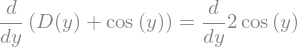



4
['add', 2, Derivative(2*cos(y), y)]


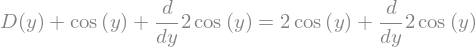



5
['substitute_RHS_for_LHS', 4, 3]


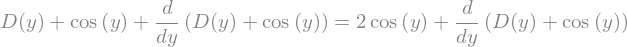



6
['evaluate_derivatives', 5]


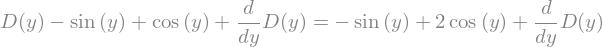

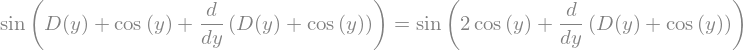

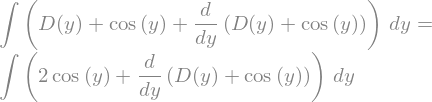

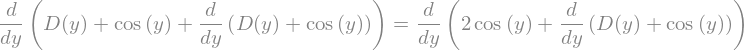

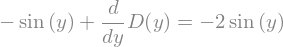

In [223]:
# check

j = 50

T = len(df) - j - 1
i = T 

reconstruct_derivation(df[df.columns[:42]], i, True)

for eq in list(df[df.columns[42:46]].iloc[i]):
    display(sp.sympify(eq))